In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("cardio_train.csv", sep=';')
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
X = df[[df.columns[i] for i in range(1, len(df.columns)-1)]]
y = df['cardio']

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25, random_state=42)

In [ ]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
test_accuracy = []
train_accuracy = []
for kernel in ['linear', 'poly', 'rbf']:
    train_acc = []
    test_acc = []

    for val in C:
        clf = svm.SVC(C=val, kernel=kernel)
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)

        train = metrics.accuracy_score(y_train, y_pred_train)
        test = metrics.accuracy_score(y_test, y_pred_test)

        train_acc.append(train)
        test_acc.append(test)

        print(f"Kernel: {kernel:8s}\tC: {val:5f}\tTraining Accuracy: {train:10f} \tTest Accuracy:     {test}")

    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)

Kernel: linear  	C: 0.001000	Training Accuracy:   0.666190 	Test Accuracy:     0.6737714285714286
Kernel: linear  	C: 0.010000	Training Accuracy:   0.711257 	Test Accuracy:     0.7143428571428572
Kernel: linear  	C: 0.100000	Training Accuracy:   0.721105 	Test Accuracy:     0.7234857142857143
Kernel: linear  	C: 1.000000	Training Accuracy:   0.722210 	Test Accuracy:     0.7241142857142857
Kernel: linear  	C: 10.000000	Training Accuracy:   0.722286 	Test Accuracy:     0.7245714285714285
Kernel: linear  	C: 100.000000	Training Accuracy:   0.722305 	Test Accuracy:     0.7245142857142857
Kernel: poly    	C: 0.001000	Training Accuracy:   0.563752 	Test Accuracy:     0.5624
Kernel: poly    	C: 0.010000	Training Accuracy:   0.612990 	Test Accuracy:     0.6144
Kernel: poly    	C: 0.100000	Training Accuracy:   0.646933 	Test Accuracy:     0.6474857142857143
Kernel: poly    	C: 1.000000	Training Accuracy:   0.686514 	Test Accuracy:     0.6833714285714285
Kernel: poly    	C: 10.000000	Training Ac

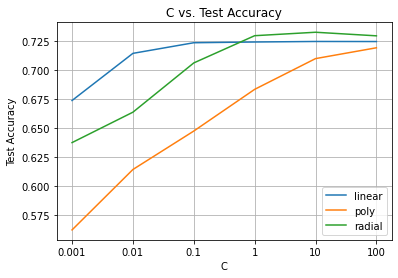

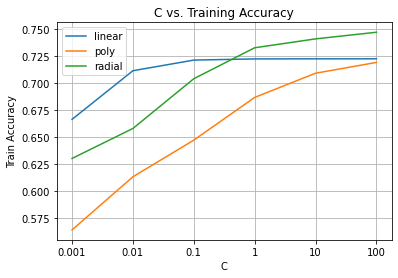

In [ ]:
C_scale = [1, 2, 3, 4, 5, 6]
labels = [str(val) for val in C]

plt.plot(C_scale, test_accuracy[0], label='linear')
plt.plot(C_scale, test_accuracy[1], label='poly')
plt.plot(C_scale, test_accuracy[2], label='radial')
plt.title('C vs. Test Accuracy')
plt.legend()
plt.grid()
plt.xticks(C_scale, labels=labels)
plt.xlabel('C')
plt.ylabel('Test Accuracy')
plt.show()

plt.plot(C_scale, train_accuracy[0], label='linear')
plt.plot(C_scale, train_accuracy[1], label='poly')
plt.plot(C_scale, train_accuracy[2], label='radial')
plt.title('C vs. Training Accuracy')
plt.grid()
plt.xticks(C_scale, labels=labels)
plt.xlabel('C')
plt.ylabel('Train Accuracy')
plt.legend()
plt.show()

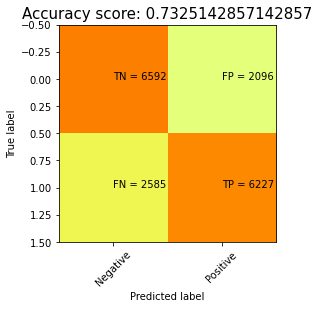

In [ ]:
clf = svm.SVC(C=10, kernel='rbf')
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
vals = metrics.confusion_matrix(y_test, y_pred_test)
acc = metrics.accuracy_score(y_test, y_pred_test)

s = [['TN', 'FP'], ['FN', 'TP']]

plt.clf()
plt.imshow(vals, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative', 'Positive']
all_sample_title = f'Accuracy score: {acc}'
plt.title(all_sample_title, size=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.xticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j]) + ' = ' + str(vals[i][j]))

plt.show()